# Task 3 - Modeling

This notebook will get you started by helping you to load the data, but then it'll be up to you to complete the task! If you need help, refer to the `modeling_walkthrough.ipynb` notebook.


## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

We want to use dataframes once again to store and manipulate the data.

In [2]:
!pip install pandas

In [3]:
import pandas as pd

---

## Section 2 - Data loading

Similar to before, let's load our data from Google Drive for the 3 datasets provided. Be sure to upload the datasets into Google Drive, so that you can access them here.

In [24]:
path = "/content/drive/MyDrive/Forage - Cognizant AI Program/Task 3/Resources/"

sales_df = pd.read_csv("sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [25]:
stock_df = pd.read_csv("sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [26]:
temp_df = pd.read_csv("sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


Now it's up to you, refer back to the steps in your strategic plan to complete this task. Good luck!

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the path to the datasets
path = "/content/drive/MyDrive/Forage - Cognizant AI Program/Task 3/Resources/"

# Load datasets
sales_df = pd.read_csv("sales.csv").drop(columns=["Unnamed: 0"], errors='ignore')
stock_df = pd.read_csv("sensor_stock_levels.csv").drop(columns=["Unnamed: 0"], errors='ignore')
temp_df = pd.read_csv("sensor_storage_temperature.csv").drop(columns=["Unnamed: 0"], errors='ignore')

# Display first few rows of each dataset
print("Sales Data:")
print(sales_df.head())
print("\nStock Levels Data:")
print(stock_df.head())
print("\nTemperature Data:")
print(temp_df.head())


Sales Data:
                         transaction_id            timestamp  \
0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed  2022-03-02 09:51:38   
1  931ad550-09e8-4da6-beaa-8c9d17be9c60  2022-03-06 10:33:59   
2  ae133534-6f61-4cd6-b6b8-d1c1d8d90aea  2022-03-04 17:20:21   
3  157cebd9-aaf0-475d-8a11-7c8e0f5b76e4  2022-03-02 17:23:58   
4  a81a6cd3-5e0c-44a2-826c-aea43e46c514  2022-03-05 14:32:43   

                             product_id category customer_type  unit_price  \
0  3bc6c1ea-0198-46de-9ffd-514ae3338713    fruit          gold        3.99   
1  ad81b46c-bf38-41cf-9b54-5fe7f5eba93e    fruit      standard        3.99   
2  7c55cbd4-f306-4c04-a030-628cbe7867c1    fruit       premium        0.19   
3  80da8348-1707-403f-8be7-9e6deeccc883    fruit          gold        0.19   
4  7f5e86e6-f06f-45f6-bf44-27b095c9ad1d    fruit         basic        4.49   

   quantity  total payment_type  
0         2   7.98     e-wallet  
1         1   3.99     e-wallet  
2         2   0.38     e-wallet 

In [36]:
# Ensure 'customer_type' is categorical
sales_df['customer_type'] = sales_df['customer_type'].astype('category')

# Define features and target variable for classification
X_classification = sales_df[['unit_price', 'quantity', 'payment_type']]
y_classification = sales_df['customer_type']

# Create preprocessing pipelines for numerical and categorical data
numerical_features = ['unit_price', 'quantity']
categorical_features = ['payment_type']

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Apply preprocessing
X_classification_preprocessed = preprocessor.fit_transform(X_classification)

# Encode the target variable
label_encoder = LabelEncoder()
y_classification_encoded = label_encoder.fit_transform(y_classification)

# Split data into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification_preprocessed, y_classification_encoded, test_size=0.2, random_state=42)


In [37]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_classification, y_train_classification)
log_reg_predictions = log_reg.predict(X_test_classification)
log_reg_accuracy = accuracy_score(y_test_classification, log_reg_predictions)
print("Logistic Regression Accuracy:", log_reg_accuracy)

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_classification, y_train_classification)
rf_predictions = rf_clf.predict(X_test_classification)
rf_accuracy = accuracy_score(y_test_classification, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


Logistic Regression Accuracy: 0.19157088122605365
Random Forest Accuracy: 0.1909323116219668


In [38]:
# Define features and target variable for regression
X_regression = sales_df[['unit_price', 'quantity']]
y_regression = sales_df['total']

# Split data into training and testing sets
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_regression, y_train_regression)
lin_reg_predictions = lin_reg.predict(X_test_regression)
lin_reg_mse = mean_squared_error(y_test_regression, lin_reg_predictions)
print("Linear Regression Mean Squared Error:", lin_reg_mse)


Linear Regression Mean Squared Error: 36.812872268986084


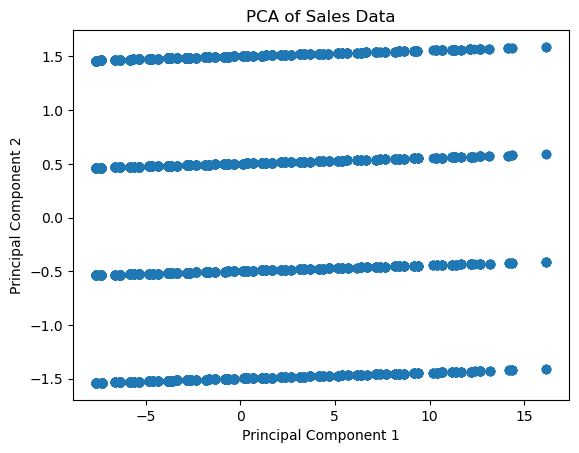

In [14]:
# Import necessary libraries for dimensionality reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define features for dimensionality reduction
X = sales_df[['unit_price', 'quantity']]

# Initialize and train the PCA model
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the principal components
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sales Data')
plt.show()


C:\Users\Mohammad Afreen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


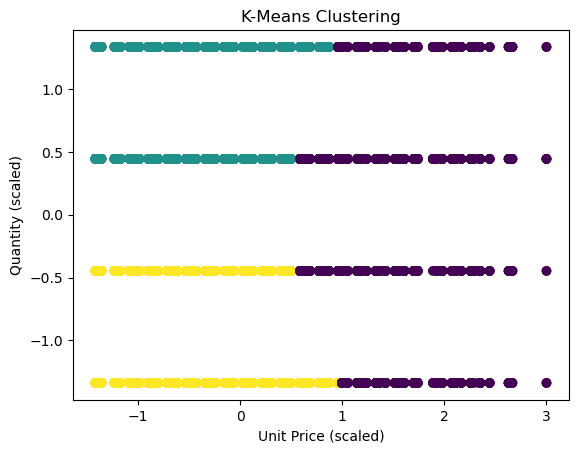

In [39]:
# Prepare data for clustering
X_clustering = sales_df[['unit_price', 'quantity']]
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_clustering_scaled)
sales_df['cluster'] = kmeans.labels_

# Visualize clusters
plt.scatter(X_clustering_scaled[:, 0], X_clustering_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Unit Price (scaled)')
plt.ylabel('Quantity (scaled)')
plt.title('K-Means Clustering')
plt.show()


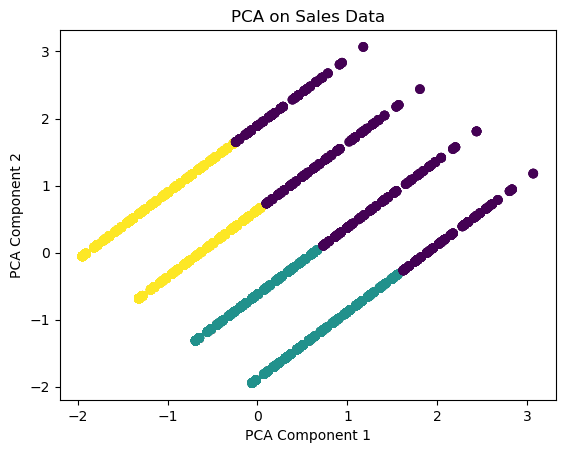

In [40]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering_scaled)

# Visualize the reduced dimensions
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA on Sales Data')
plt.show()


In [41]:
# Compare Logistic Regression and Random Forest
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

# Based on the accuracy, you can choose the best model
best_model = rf_clf if rf_accuracy > log_reg_accuracy else log_reg
print("Best Model:", "Random Forest" if best_model == rf_clf else "Logistic Regression")


Logistic Regression Accuracy: 0.19157088122605365
Random Forest Accuracy: 0.1909323116219668
Best Model: Logistic Regression
